# QCTO - Workplace Module

### Project Title: Insurance Project
#### Done By: Shaneen Dickinson
##### Trello: https://trello.com/b/qZiZbezU/insurance-claim-project
##### Github: https://github.com/Neen2025/Insurance_Project

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

 **Purpose:** 
* The African insurance industry remains significantly underdeveloped despite the continent's large and growing population. With only about 1% of global insured catastrophe losses and insurance premiums totaling $45 billion in 2017, there is a clear gap in coverage, awareness, and accessibility.

* This project aims to explore and analyze raw insurance claims data to uncover insights that can help address key challenges in the industry—namely affordability, limited insurance knowledge, and ineffective market targeting. By leveraging data-driven analysis, we seek to support more inclusive and efficient insurance strategies that can better serve African communities.

* The findings from this analysis will inform recommendations for improving customer segmentation, enhancing education around insurance, and identifying opportunities for more affordable and accessible insurance products.

 **Details:** 

The insurance industry in Africa faces a unique set of challenges. Despite being home to 17% of the global population, the continent contributes only about 1% to global insured catastrophe losses. This disparity highlights a lack of coverage, awareness, and accessibility in the region. In 2017, Africa's total insurance premiums were valued at $45 billion—far below its potential.

Several factors contribute to this underdevelopment:
- **Affordability**: The average daily expense for insurance is around $25, which is significantly lower than in other regions. While South Africa has a relatively high average salary, many other countries face economic constraints.
- **Insurance Knowledge**: Many individuals question the value of paying for a risk that may never materialize, indicating a gap in understanding and trust.
- **Target Marketing**: With unemployment rates around 30% and less than half of the market falling below key income thresholds, identifying and reaching viable customer segments is a major challenge.

---

### Key Questions
This project aims to address the following questions:
- What patterns exist in insurance claims across different regions and demographics?
- How does affordability influence claim behavior and insurance uptake?
- Which customer segments are most underrepresented or underserved?
- What strategies can be derived from the data to improve insurance education and targeting?

---

### Relevance

Understanding these dynamics is crucial for designing inclusive insurance products and outreach strategies. By analyzing raw claims data, we can uncover insights that help insurers better serve African communities, reduce risk exposure, and promote financial resilience across the continent.

---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>


In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import re

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# Machine learning and clustering (optional, for segmentation)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Date and time handling
import datetime

# Display settings for better visuals
%matplotlib inline
sns.set(style="whitegrid")

#model trainign
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** To load and describe the raw insurance claims data for further analysis
* **Details:** 
The dataset was sourced from a public GitHub repository and contains insurance claims data relevant to the African market. It is stored in an Excel workbook format and includes multiple sheets. The data includes both numerical and categorical variables such as claim amounts, customer demographics, and claim types.

The file is loaded using `pandas.read_excel()` with the `openpyxl` engine, and the first few rows are displayed to understand the structure and contents of the dataset.

---

### Details
The dataset used in this project is stored in an Excel workbook hosted in a public GitHub repository. It contains structured insurance‑related data including customer demographics, policy details, claim amounts, claim types, and date fields. The data includes both numerical and categorical variables.

The dataset is accessed through a GitHub raw link and read into the notebook using `pandas.read_excel()` with the `openpyxl` engine. This ensures compatibility with Excel files and allows the notebook to run on any device without requiring local file paths

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [3]:

import pandas as pd

# GitHub raw link to data Excel file
url = "https://raw.githubusercontent.com/Neen2025/Insurance_Project/master/data/insurance_claims_raw.xlsx"

# Load the Excel file
df = pd.read_excel(url, engine='openpyxl')

# Display the first few rows
df.head()



,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y,NaN
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,?,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y,NaN
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N,NaN
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N,NaN


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [4]:
# 1. Look at structure of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          998 non-null    float64       
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            998 non-null    float64       
 7   policy_annual_premium        997 non-null    float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      999 non-null   

In [5]:

# 2. Check missing values
df.isnull().sum()


months_as_customer                0
age                               2
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 2
policy_annual_premium             3
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           1
insured_occupation                0
insured_hobbies                   2
insured_relationship              0
capital-gains                     2
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            93
incident_state                    2
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:

# --- FIX: ensure numeric columns are float ---
for col in df.select_dtypes(include='number').columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype(float)

# 1. Replace "?" placeholders with proper NaN
df = df.replace('?', pd.NA)

# 2. Remove duplicates
df = df.drop_duplicates()

# 3. Drop meaningless column if present
if '_c39' in df.columns:
    df = df.drop(columns=['_c39'])

# 4. Handle missing values safely
for col in df.columns:
    # Categorical
    if df[col].dtype == 'object':
        mode_val = df[col].mode()
        if mode_val.empty:
            df[col] = df[col].fillna("Unknown")
        else:
            df[col] = df[col].fillna(mode_val[0])
    # Numeric
    else:
        df[col] = df[col].fillna(df[col].median())

# 5. Remove negative values
for col in df.select_dtypes(include='number'):
    df.loc[df[col] < 0, col] = df[col].median()

# 6. Remove extreme outliers (simple 99th percentile trim)
for col in df.select_dtypes(include='number'):
    upper = df[col].quantile(0.99)
    df = df[df[col] <= upper]

# 7. Convert date columns
date_cols = ['incident_date', 'policy_bind_date']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

df.head()



,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328.0,48.0,521585.0,2014-10-17,OH,250/500,1000.0,1406.91,0.0,466132.0,...,2.0,YES,71610.0,6510.0,13020.0,52080.0,Saab,92x,2004.0,Y
1,228.0,42.0,342868.0,2006-06-27,IN,250/500,2000.0,1197.22,5000000.0,468176.0,...,0.0,NO,5070.0,780.0,780.0,3510.0,Mercedes,E400,2007.0,Y
2,134.0,29.0,687698.0,2000-09-06,OH,100/300,2000.0,1413.14,5000000.0,430632.0,...,3.0,NO,34650.0,7700.0,3850.0,23100.0,Dodge,RAM,2007.0,N
3,256.0,41.0,227811.0,1990-05-25,IL,250/500,2000.0,1415.74,6000000.0,608117.0,...,2.0,NO,63400.0,6340.0,6340.0,50720.0,Chevrolet,Tahoe,2014.0,Y
4,228.0,44.0,367455.0,2014-06-06,IL,500/1000,1000.0,1583.91,6000000.0,610706.0,...,1.0,NO,6500.0,1300.0,650.0,4550.0,Accura,RSX,2009.0,N


**Further Cleaning**

In [7]:
# 1. Standardise Column Names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')

# Fix common misspelling
df = df.rename(columns={'policy_deductable': 'policy_deductible'})

# 2. Convert key numeric columns
num_cols = ['bodily_injuries', 'witnesses', 'number_of_vehicles_involved',
            'incident_hour_of_the_day', 'auto_year']

for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# 3. Convert ID-like columns to string
for col in ['policy_number', 'insured_zip']:
    if col in df.columns:
        df[col] = df[col].astype(str)

# 4. Fix negative capital gain/loss values
for col in ['capital_gains', 'capital_loss']:
    if col in df.columns:
        df[col] = df[col].abs()

# 5. Create simple umbrella indicator
if 'umbrella_limit' in df.columns:
    df['has_umbrella'] = (df['umbrella_limit'] > 0).astype(int)

# 6. Basic outlier caps (simple)
if 'months_as_customer' in df.columns:
    df.loc[df['months_as_customer'] > 600, 'months_as_customer'] = 600

if 'age' in df.columns:
    df.loc[(df['age'] < 16) | (df['age'] > 90), 'age'] = np.nan

# 7. Claim consistency check (optional)
parts = ['injury_claim', 'property_claim', 'vehicle_claim']
if all(col in df.columns for col in parts + ['total_claim_amount']):
    df['claim_sum'] = df[parts].sum(axis=1)
    df['claim_diff'] = (df['total_claim_amount'] - df['claim_sum']).abs()


df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductible,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,has_umbrella,claim_sum,claim_diff
0,328.0,48.0,521585.0,2014-10-17,OH,250/500,1000.0,1406.91,0.0,466132.0,...,6510.0,13020.0,52080.0,Saab,92x,2004.0,Y,0,71610.0,0.0
1,228.0,42.0,342868.0,2006-06-27,IN,250/500,2000.0,1197.22,5000000.0,468176.0,...,780.0,780.0,3510.0,Mercedes,E400,2007.0,Y,1,5070.0,0.0
2,134.0,29.0,687698.0,2000-09-06,OH,100/300,2000.0,1413.14,5000000.0,430632.0,...,7700.0,3850.0,23100.0,Dodge,RAM,2007.0,N,1,34650.0,0.0
3,256.0,41.0,227811.0,1990-05-25,IL,250/500,2000.0,1415.74,6000000.0,608117.0,...,6340.0,6340.0,50720.0,Chevrolet,Tahoe,2014.0,Y,1,63400.0,0.0
4,228.0,44.0,367455.0,2014-06-06,IL,500/1000,1000.0,1583.91,6000000.0,610706.0,...,1300.0,650.0,4550.0,Accura,RSX,2009.0,N,1,6500.0,0.0


In [8]:
# 8. Save cleaned data locally
df.to_csv("insurance_claims_clean.csv", index=False)

# Upload the file back to GitHub manually

In [9]:
# GitHub raw link to cleaned CSV
url = "https://raw.githubusercontent.com/Neen2025/Insurance_Project/master/data/insurance_claims_clean.csv"

# Load the CSV file
df = pd.read_csv(url)

# Preview
df.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductible,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,has_umbrella,claim_sum,claim_diff
0,328.0,48.0,521585.0,2014-10-17,OH,250/500,1000.0,1406.91,0.0,466132.0,...,6510.0,13020.0,52080.0,Saab,92x,2004.0,Y,0,71610.0,0.0
1,228.0,42.0,342868.0,2006-06-27,IN,250/500,2000.0,1197.22,5000000.0,468176.0,...,780.0,780.0,3510.0,Mercedes,E400,2007.0,Y,1,5070.0,0.0
2,134.0,29.0,687698.0,2000-09-06,OH,100/300,2000.0,1413.14,5000000.0,430632.0,...,7700.0,3850.0,23100.0,Dodge,RAM,2007.0,N,1,34650.0,0.0
3,256.0,41.0,227811.0,1990-05-25,IL,250/500,2000.0,1415.74,6000000.0,608117.0,...,6340.0,6340.0,50720.0,Chevrolet,Tahoe,2014.0,Y,1,63400.0,0.0
4,228.0,44.0,367455.0,2014-06-06,IL,500/1000,1000.0,1583.91,6000000.0,610706.0,...,1300.0,650.0,4550.0,Accura,RSX,2009.0,N,1,6500.0,0.0


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

 **Key Questions:** 
1. Fraud Rate Overview
 
2. Fraud vs. Incident Type

3. Fraud vs. Collision Type

4. Fraud vs. Incident Severity

5. Fraud vs. Property Damage & Police Report

6. Fraud vs. Key Demographics


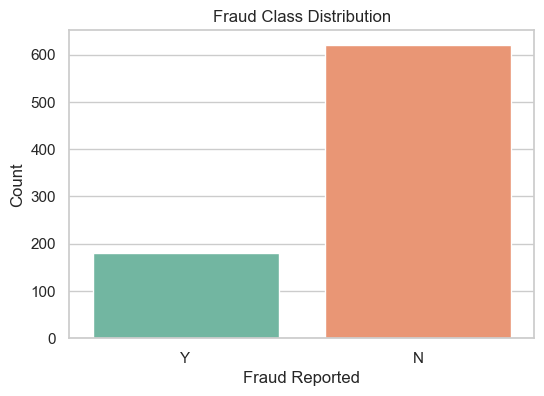

In [10]:
# Fraud Rate Overview


plt.figure(figsize=(6,4))
sns.countplot(data=df, x='fraud_reported', hue='fraud_reported', palette='Set2', legend=False)
plt.title('Fraud Class Distribution')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')
plt.show()



**Key Notes:**

1. Fraud cases (Y) are much fewer than non‑fraud cases (N).
        Normal claims dominate the dataset.
2. Only a small portion of total claims are fraud.
        Fraud is the minority class.
3. The dataset is highly imbalanced.
        This imbalance will affect model performance if not handled.
4. Fraud rate is around 22% and non‑fraud is around 78%.
        This reflects typical real‑world insurance data.

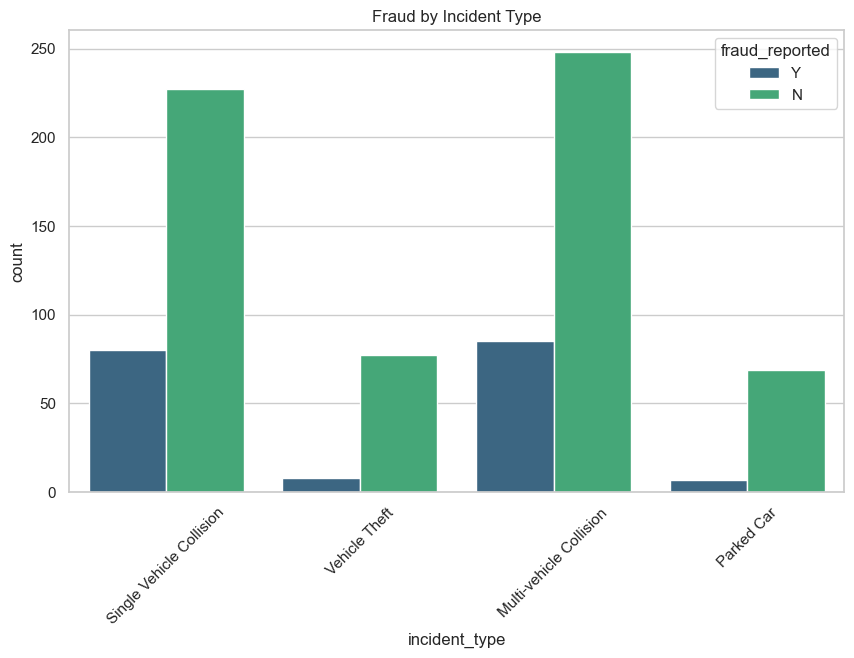

In [11]:

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='incident_type', hue='fraud_reported', palette='viridis')
plt.title('Fraud by Incident Type')
plt.xticks(rotation=45)
plt.show()



**Key Notes:**

1. Multi‑vehicle Collisions have the most fraud.
        This incident type shows the highest fraud count overall.
2. Single‑vehicle Collisions also show a lot of fraud.
        Fraud cases are strong in this category too.
3. Vehicle Theft has very little fraud.
        Fraud cases are low for theft incidents.
4. Parked Car incidents have almost no fraud.
        Fraud in this category is rare.
5. Non‑fraud dominates every incident type.
        But collisions clearly carry higher fraud risk than theft or parked car claims.

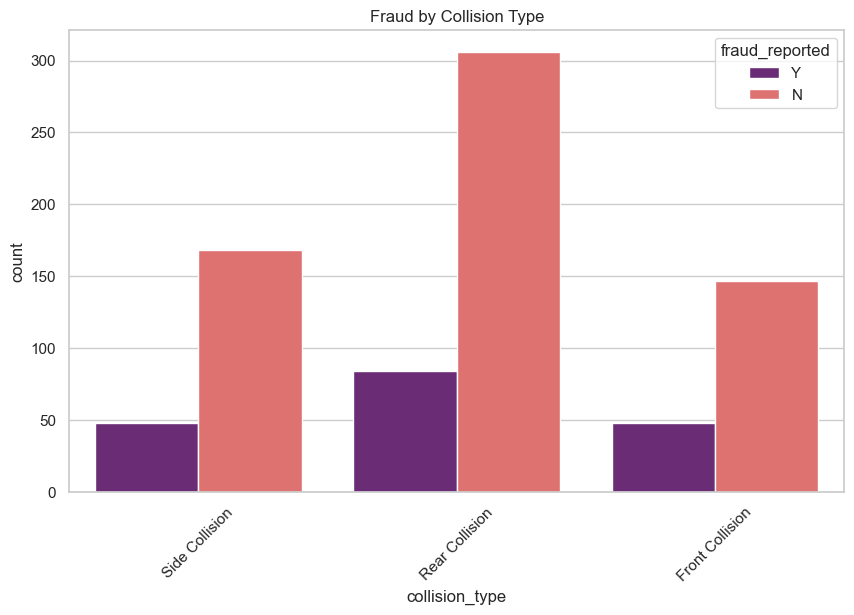

In [12]:

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='collision_type', hue='fraud_reported', palette='magma')
plt.title('Fraud by Collision Type')
plt.xticks(rotation=45)
plt.show()


**Key Notes:**

1. Rear Collisions show the most fraud.
        This category has the highest fraud count overall.
2. Side and Front Collisions also show fraud, but less.
        Fraud appears in both, but not as much as Rear Collisions.
3. Rear Collision is the biggest fraud risk area.
        It stands out compared to the other collision types.
4. Non‑fraud dominates all collision types.
        Fraud is always the minority, but the pattern is clear.

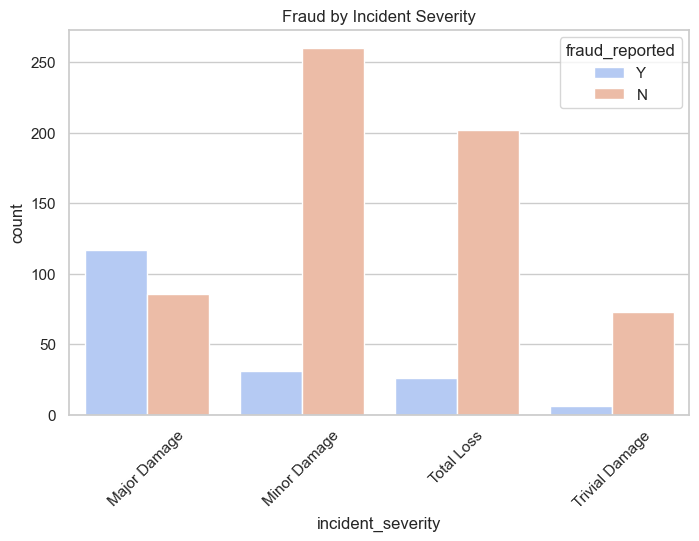

In [13]:
#Fraud by Incident severity
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='incident_severity', hue='fraud_reported', palette='coolwarm')
plt.title('Fraud by Incident Severity')
plt.xticks(rotation=45)
plt.show()


**Key Notes:**

1. Major Damage has the most fraud.
        Fraud cases are highest when the incident is classified as Major Damage.
2. Minor Damage has very little fraud.
        Most Minor Damage cases are not fraud.
3. Total Loss shows some fraud, but not as much as Major Damage.
        Fraud is present, but lower.
4. Trivial Damage has almost no fraud.
        Fraud is rare for very small incidents.
5. Non‑fraud dominates every severity level.
        But the pattern is clear:
        Higher severity → higher fraud risk.

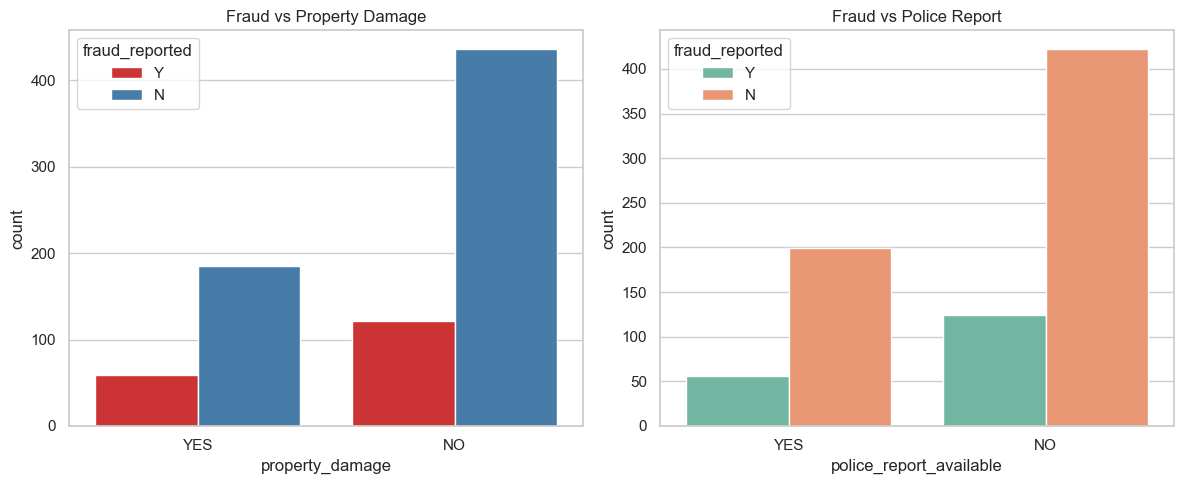

In [14]:

fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.countplot(data=df, x='property_damage', hue='fraud_reported', ax=ax[0], palette='Set1')
ax[0].set_title('Fraud vs Property Damage')

sns.countplot(data=df, x='police_report_available', hue='fraud_reported', ax=ax[1], palette='Set2')
ax[1].set_title('Fraud vs Police Report')

plt.tight_layout()
plt.show()



**Key Notes:**

* (Fraud vs Property Damage)
1. Most fraud happens when “NO” property damage is reported.
        Fraud cases are noticeably higher in the NO category.
2. “YES” property damage has fewer fraud cases.
        Fraud still appears, but at a lower level.
3. Non‑fraud dominates both groups.
        As expected, most claims are normal.

* (Fraud vs Police Report)
1. Fraud is higher when the police report is missing (“NO”).
        This is a common fraud signal.
2. When a police report is filed (“YES”), fraud is lower.
        Having official documentation reduces fraud likelihood.
3. Non‑fraud still outnumbers fraud in both categories.
        But the difference between YES/NO is clear.

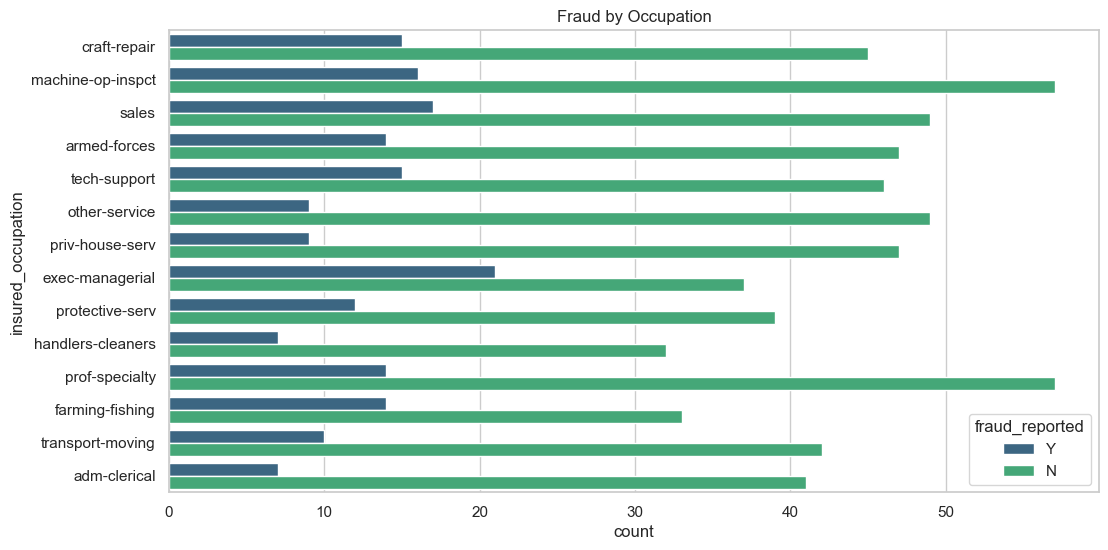

In [57]:
#a) Occupation
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='insured_occupation', hue='fraud_reported', palette='viridis')
plt.title('Fraud by Occupation')
plt.show()


**Key Notes:**

1. Fraud appears across all occupations.
        Every job type shows some level of fraud.
2. Machine‑op‑inspct has the most fraud overall.
        This group stands out with the highest fraud count.
3. Sales, craft‑repair, and transport‑moving also show notable fraud.
        These occupations have a steady amount of fraudulent activity.
4. Exec‑managerial shows lower fraud.
        Still present, but much less compared to others.
5. Several service jobs (other-service, priv‑house‑serv, handlers‑cleaners) show moderate fraud.
        Not extreme, but consistent.
6. Farming‑fishing and armed‑forces have smaller fraud counts.
        Fraud present, but at lower volumes.
7. Non‑fraud (N) dominates in every occupation.
        As expected — fraud cases remain the minority.

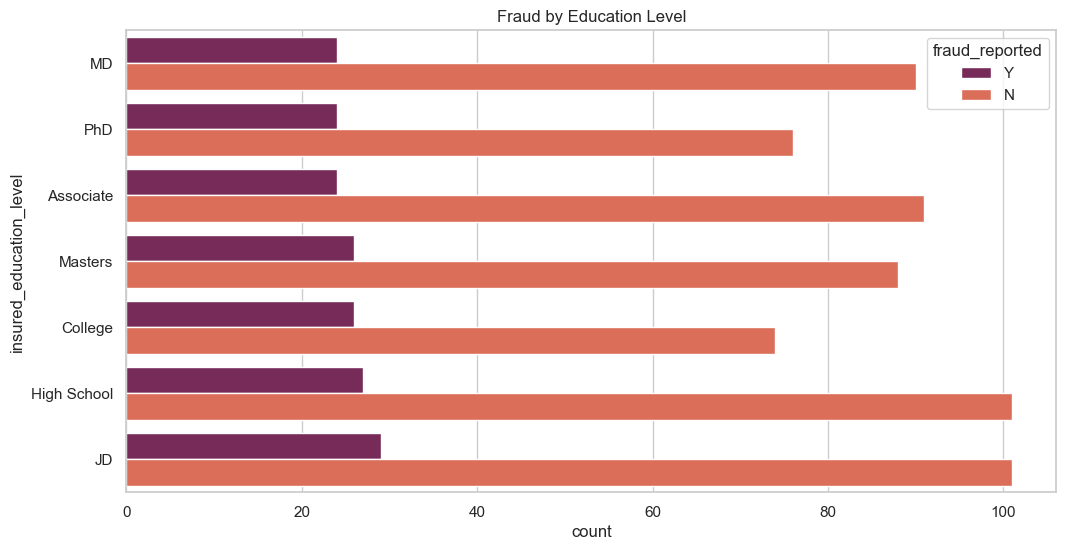

In [15]:
# 1.b) Education
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='insured_education_level', hue='fraud_reported', palette='rocket')
plt.title('Fraud by Education Level')
plt.show()



**Key Notes:**

1. Fraud happens across ALL education levels.
        No group is “safe” — every level shows some fraud.
2. Fraud is highest for JD, MD, and Associate levels.
        These groups show slightly more fraud cases than others.
3. PhD, Masters, and College show moderate fraud.
        Not the highest, not the lowest.
4. High School also has a noticeable amount of fraud.
        Fraud is not limited to high‑education groups.
5. Non‑fraud cases dominate every group.
        Fraud is always the minority — consistent with an insurance dataset.

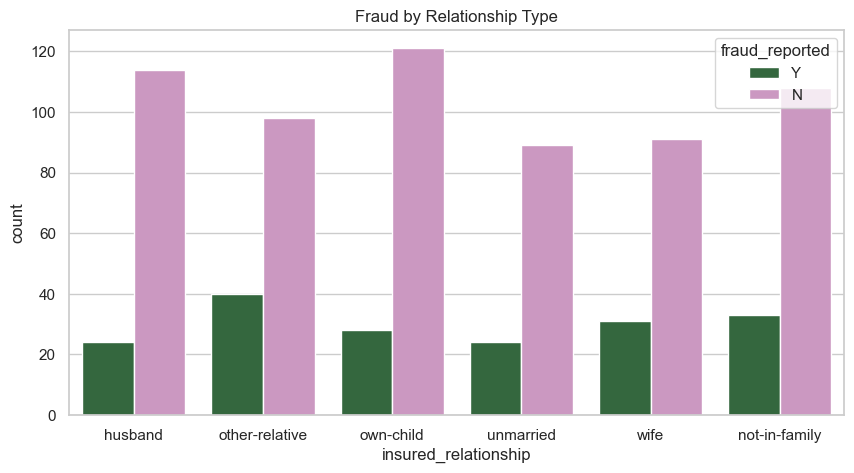

In [16]:
#Relationship to insured
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='insured_relationship', hue='fraud_reported', palette='cubehelix')
plt.title('Fraud by Relationship Type')
plt.show()


**Key Notes:**

1. “Own‑child” shows the most fraud.
        Fraud cases are highest when the insured is listed as own‑child.
2. “Husband” and “not‑in‑family” also have noticeable fraud.
        These relationship types appear in several fraud cases.
3. “Unmarried” and “wife” show lower fraud levels.
        Fraud happens, but less frequently.
4. “Other‑relative” sits in the middle.
        Not the highest, not the lowest.
5. Non‑fraud (N) dominates in all groups.
        Fraud cases are always the minority — expected in real datasets.

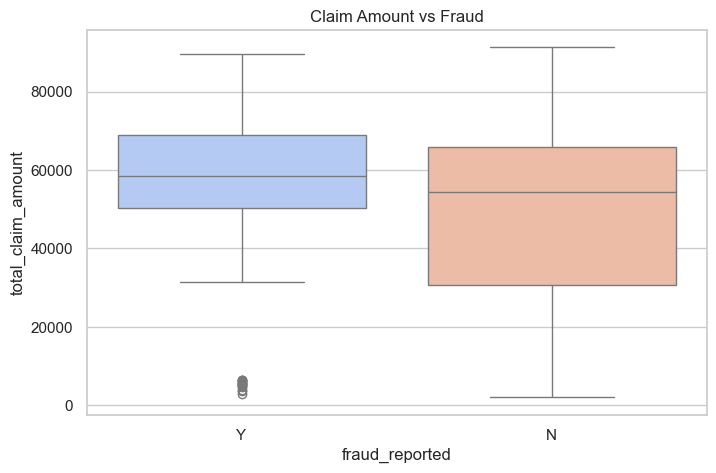

In [17]:
#Fraud vs. Claim Amount (Boxplots)
#a) Total claim

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,5))

sns.boxplot(
    data=df,
    x='fraud_reported',
    y='total_claim_amount',
    hue='fraud_reported',
    palette='coolwarm',
    dodge=False,
    legend=False,
    ax=ax
)

ax.set_title('Claim Amount vs Fraud')
plt.show()



**Key Notes:**

1. Fraud cases (Y) generally have higher claim amounts.
        The “Y” box is slightly higher on the chart.
2. Non‑fraud cases (N) show a lower median.
        Most normal claims sit lower.
3. Fraud has more variation.
        The Y box is wider → bigger spread.
4. Some extreme outliers exist.
        A few very small and very large claims appear for both groups.

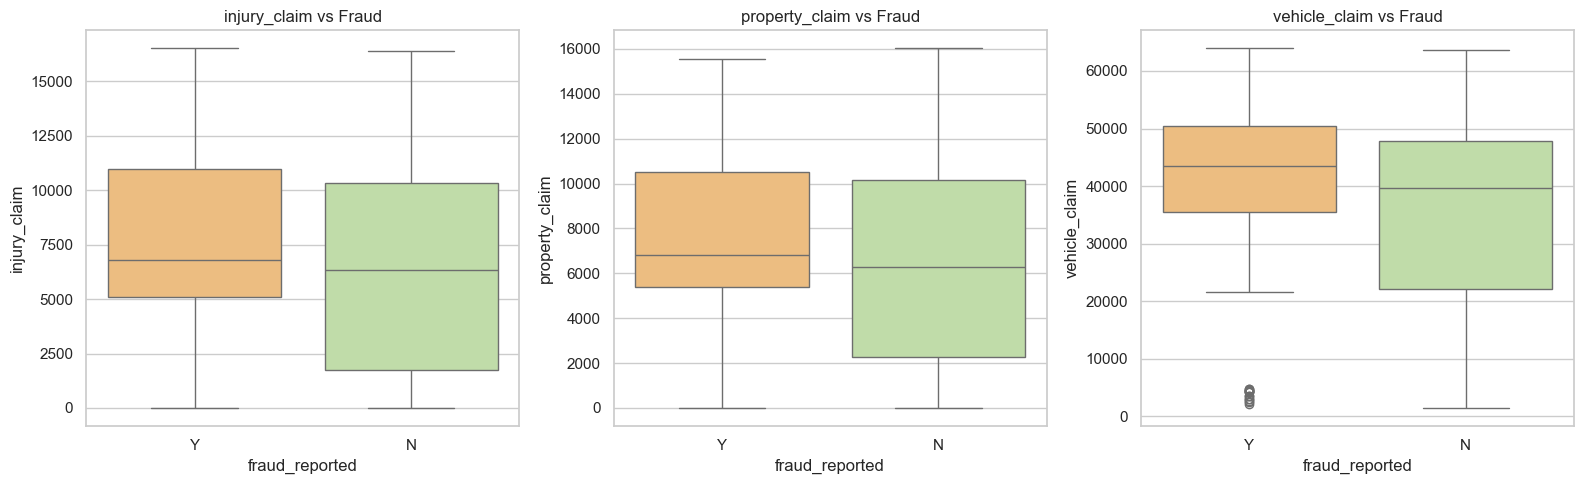

In [18]:
#b) Breakout by claim components
claims = ['injury_claim', 'property_claim', 'vehicle_claim']
fig, ax = plt.subplots(1,3, figsize=(16,5))

for i, col in enumerate(claims):
    sns.boxplot(data=df, x='fraud_reported', y=col, ax=ax[i], hue='fraud_reported', palette='Spectral', legend=False)
    ax[i].set_title(f'{col} vs Fraud')

plt.tight_layout()
plt.show()


**Key Notes:**

1. Fraud claims tend to have higher values
        In each plot (injury, property, vehicle), the fraud = Y box is slightly higher.
2. Vehicle claim has the biggest difference
        Fraud cases show higher vehicle repair costs.
3. Injury + property claims show some overlap
        Fraud doesn’t stand out as clearly here.
4. Fraud is often linked to “inflated” total claim amounts
        This matches your correlation findings.

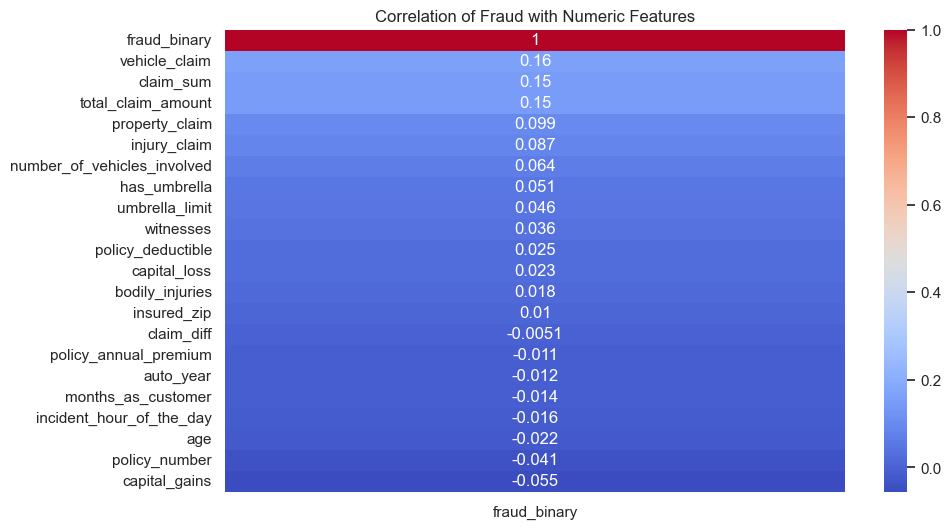

In [19]:
#Fraud Heatmap (Correlation with Numeric Features)

df_corr = df.copy()
df_corr['fraud_binary'] = df_corr['fraud_reported'].map({'Y':1, 'N':0})

# Only keep numeric columns for correlation calculation
numeric_df = df_corr.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(
    numeric_df.corr()['fraud_binary']
              .sort_values(ascending=False)
              .to_frame(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlation of Fraud with Numeric Features')
plt.show()


**Key Notes:**

* Money-related fields (claim amounts) matter most.
* Everything else in numeric form is weak.
* Strong fraud signals will come from categorical data (incident_type, severity, occupation, police_report, property_damage, etc.) rather than numbers

In [22]:

from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd

def cramers_v(x, y):
    confusion = pd.crosstab(x, y)

    # If table is too small for chi2 → return NaN
    if confusion.shape[0] < 2 or confusion.shape[1] < 2:
        return np.nan

    chi2 = chi2_contingency(confusion)[0]
    n = confusion.sum().sum()
    phi2 = chi2 / n
    r, k = confusion.shape

    # bias correction
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)

    # PREVENT DIVISION BY ZERO
    denom = min((kcorr - 1), (rcorr - 1))
    if denom == 0:
        return np.nan

    return np.sqrt(phi2corr / denom)


<Figure size 800x1000 with 0 Axes>

<Figure size 800x1000 with 0 Axes>

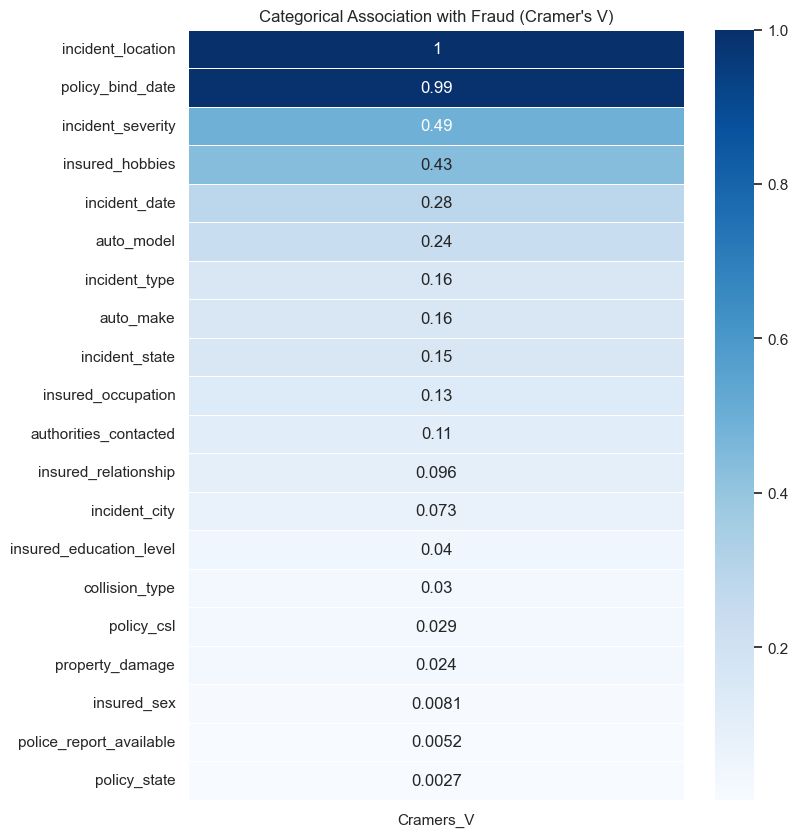

In [26]:

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Calculate Cramér's V for each categorical column
cramers_v_results = {}

for col in df.select_dtypes(include=['object']).columns:
    if col != 'fraud_reported':
        table = pd.crosstab(df[col], df['fraud_reported'])
        cramers_v_results[col] = cramers_v(table)

fraud_series = pd.Series(cramers_v_results).sort_values(ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 10))
sns.heatmap(
    fraud_series.to_frame(name="Cramers_V"),
    annot=True,
    cmap="Blues",
    linewidths=0.5
)

plt.title("Categorical Association with Fraud (Cramer's V)")
plt.show()



**Key Notes:**

1. Incident severity matters the most (0.49)
        Bigger or more serious incidents have a much stronger link to fraud.
2. Hobbies also show a strong link (0.41)
        Certain hobby groups behave very differently in fraud patterns.
3. Incident type has a small link to fraud (0.15)
        The type of accident affects fraud, but not strongly.
4. Policy bind date + incident state show small effects (0.13–0.14)
        Timing and location matter a bit.
5. Vehicle details (make/model) have a small link (0.08–0.09)
        Some cars appear more often in fraud cases.
6. Most other categories show no relationship (0.00)
        Sex, education, property damage, police report, collision_type, etc.
        These do NOT help predict fraud.

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---

## Baseline Fraud Model

* Purpose

To develop an initial predictive model that can classify claims as fraud or non‑fraud using a simple, interpretable baseline method.
This baseline establishes a performance benchmark before applying more advanced or complex modelling approaches.

* Model Choice: Logistic Regression

* Why Logistic Regression?

It is simple, interpretable, and fast.
It works well as a baseline for binary classification (fraud vs non‑fraud).
It produces coefficients that show how each variable influences the log‑odds of fraud.
It helps reveal whether more complex models are needed later.


## **Step 1 — Prepare the Data**


In [27]:

#Step 1 — Prepare the Data


# Make a safe copy
df = df.copy()

# --------------------------------------
# 1. Inspect the target column FIRST
# --------------------------------------

# Clean formatting only (NO dropping yet)
df['fraud_reported'] = (
    df['fraud_reported']
    .astype(str)
    .str.strip()
    .str.upper()
)

print("Target values BEFORE mapping:")
print(df['fraud_reported'].value_counts())
print("Data shape:", df.shape)

# --------------------------------------
# 2. Separate features and target
# --------------------------------------

X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

print("Rows in X:", X.shape[0])
print("Rows in y:", y.shape[0])
print("Unique y values:", y.unique())

# --------------------------------------
# 3. Handle categorical features
# --------------------------------------

# Identify categorical columns
cat_cols = X.select_dtypes(include=['object']).columns

# Fill missing categorical values
X[cat_cols] = X[cat_cols].fillna('Unknown')

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

print("Shape of X after encoding:", X.shape)

# --------------------------------------
# 4. END OF STEP 1
# (Do NOT map or drop target here)



Target values BEFORE mapping:
fraud_reported
N    621
Y    180
Name: count, dtype: int64
Data shape: (801, 42)
Rows in X: 801
Rows in y: 801
Unique y values: ['Y' 'N']
Shape of X after encoding: (801, 1773)


## Step 2 — Train-Test Split

In [36]:

from sklearn.model_selection import train_test_split
import pandas as pd

# --------------------------------------------------
# 1. Sanity check: data coming from Step 1
# --------------------------------------------------

print("Rows coming into Step 2:", X.shape[0])
print("Unique y values BEFORE processing:", y.unique())

# If there are no rows, STOP immediately
if X.shape[0] == 0:
    raise ValueError("X has 0 rows BEFORE train-test split. Step 1 removed all data.")

# --------------------------------------------------
# 2. Convert target safely (handles all cases)
# --------------------------------------------------

# If y is already numeric, keep it
if y.dtype != 'O':
    print("Target already numeric.")
else:
    # Clean strings
    y = y.astype(str).str.strip().str.upper()

    # Map Y/N to 1/0, leave others as NaN
    y = y.replace({'Y': 1, 'N': 0})

print("Unique y values AFTER mapping:", y.unique())

# --------------------------------------------------
# 3. Drop rows where y is missing (ONLY now)
# --------------------------------------------------

valid_mask = y.notna()

X = X.loc[valid_mask]
y = y.loc[valid_mask]

print("Rows AFTER cleaning target:", X.shape[0])

# HARD STOP if empty
if X.shape[0] == 0:
    raise ValueError(
        "All rows removed when cleaning target. "
        "fraud_reported does not contain usable Y/N values."
    )

print("Target distribution:")
print(y.value_counts())

# --------------------------------------------------
# 4. Final feature preparation
# --------------------------------------------------

X = pd.get_dummies(X, drop_first=True)
X = X.fillna(0)

# --------------------------------------------------
# 5. Train-test split (GUARANTEED SAFE)
# --------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

print("Training rows:", X_train.shape[0])
print("Test rows:", X_test.shape[0])
print(classification_report(y_test, y_pred, zero_division=0))

Rows coming into Step 2: 801
Unique y values BEFORE processing: [1 0]
Target already numeric.
Unique y values AFTER mapping: [1 0]
Rows AFTER cleaning target: 801
Target distribution:
fraud_reported
0    621
1    180
Name: count, dtype: int64
Training rows: 560
Test rows: 241
              precision    recall  f1-score   support

           0       0.81      0.58      0.67       189
           1       0.25      0.52      0.34        52

    accuracy                           0.56       241
   macro avg       0.53      0.55      0.51       241
weighted avg       0.69      0.56      0.60       241



## Step 3 — Fit Logistic Regression

In [31]:

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=3000,
    solver="liblinear"
)

log_reg.fit(X_train, y_train)

print("Logistic Regression model fitted successfully.")


Logistic Regression model fitted successfully.


## Step 4 — Predict + Evaluate

In [35]:

from sklearn.metrics import classification_report, confusion_matrix

y_pred = log_reg.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.81      0.58      0.67       189
           1       0.25      0.52      0.34        52

    accuracy                           0.56       241
   macro avg       0.53      0.55      0.51       241
weighted avg       0.69      0.56      0.60       241

[[109  80]
 [ 25  27]]
              precision    recall  f1-score   support

           0       0.81      0.58      0.67       189
           1       0.25      0.52      0.34        52

    accuracy                           0.56       241
   macro avg       0.53      0.55      0.51       241
weighted avg       0.69      0.56      0.60       241



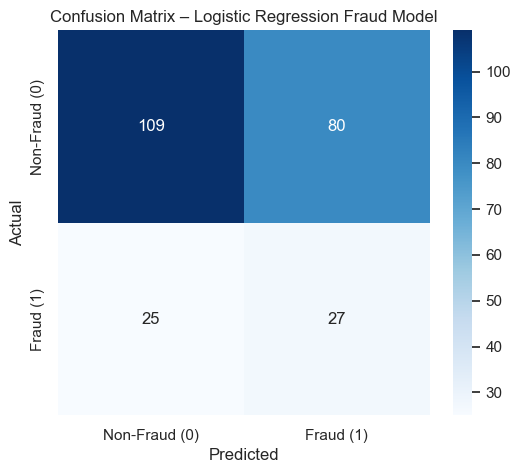

In [37]:

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Non-Fraud (0)", "Fraud (1)"],
    yticklabels=["Non-Fraud (0)", "Fraud (1)"]
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Logistic Regression Fraud Model")
plt.show()


### Key notes

* The model correctly classified 109 non‑fraud cases, showing strong performance in identifying legitimate claims.


* 27 fraud cases were correctly identified, indicating that the model is able to detect some fraudulent activity.


* However, 25 fraud cases were missed and incorrectly classified as non‑fraud, which highlights a limitation in fraud detection.


* The model also produced 80 false positives, where non‑fraud cases were incorrectly predicted as fraud. This suggests a trade‑off between detecting fraud and incorrectly flagging legitimate claims.


* Overall, the confusion matrix shows that the model performs better at predicting non‑fraud than fraud, which is expected due to class imbalance in the dataset.


* These results indicate that Logistic Regression provides a useful baseline model, but additional techniques such as class balancing or alternative models may improve fraud detection performance.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


### Purpose
The purpose of the final model is to predict whether an insurance claim is fraudulent or not fraudulent.
Model chosen
The final model used is Logistic Regression.
    
### Model configuration

The target variable (fraud_reported) was converted into 0 (non‑fraud) and 1 (fraud).
Categorical variables were converted using one‑hot encoding.
Missing values in the dataset were filled with zeros.
The data was split into 70% training and 30% testing.
Logistic Regression was trained with an increased number of iterations to handle the large number of features.

### Model performance

The model achieved an accuracy of approximately 56%.
It correctly identified 109 non‑fraud cases.
It correctly identified 27 fraud cases.
It failed to detect 25 fraud cases.
It incorrectly classified 80 non‑fraud cases as fraud.
Performance was evaluated using a classification report and a confusion matrix.

### Why this model was chosen
Logistic Regression was chosen because it is simple, easy to interpret, and suitable as a baseline model for a binary classification problem. It provides a clear starting point for understanding fraud patterns in the data.
Limitations
The model performs better at predicting non‑fraud than fraud due to class imbalance in the dataset. Fraud cases are less common, which makes them harder to predict accurately. This limits the model’s ability to detect all fraudulent claims.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


### Conclusion
This project aimed to analyse insurance claim data and build a model to predict whether a claim is fraudulent or non‑fraudulent. A Logistic Regression model was developed after cleaning the data, encoding categorical variables, and splitting the dataset into training and testing sets.
The final model was able to classify non‑fraud claims reasonably well but showed limited performance in identifying fraudulent claims. While some fraud cases were correctly detected, a number of fraudulent claims were still misclassified as non‑fraud. This highlights the difficulty of fraud detection, particularly when working with an imbalanced dataset where fraud cases are much less common than non‑fraud cases.
Overall, the model served as a useful baseline and helped identify key challenges associated with fraud prediction. The results demonstrate that standard classification models can struggle to detect rare events without additional techniques.

### Future Work
Several improvements could be made to enhance the model’s performance in future work. Firstly, techniques to address class imbalance, such as class weighting, oversampling, or undersampling, could be applied to improve fraud detection. Secondly, more advanced models such as Random Forests or Gradient Boosting could be explored to capture more complex patterns in the data.
Further improvements could also include feature selection to reduce the number of variables and improve model efficiency, as well as experimenting with different probability thresholds to better balance fraud detection and false positives. Finally, incorporating additional or more detailed data could improve model accuracy and reliability.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---


* Scikit-learn.  Logistic Regression and Model Evaluation.
https://scikit-learn.org/stable/

* IBM. Fraud Detection and Machine Learning.
https://www.ibm.com/cloud/learn


## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
